<a href="https://colab.research.google.com/github/Sriya987/Hackweek/blob/main/iris_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
from sklearn.preprocessing import OneHotEncoder


In [12]:
encoder=OneHotEncoder()
species_encoded_sparse = encoder.fit_transform(df['species'].values.reshape(-1,1))
species_encoded_dense = species_encoded_sparse.toarray()
category_names = encoder.get_feature_names_out(['species'])
df = df.drop('species', axis=1)
species = pd.DataFrame(species_encoded_dense, columns=category_names, index=df.index)
df = pd.concat([df, species], axis=1)


In [19]:
print("mean: \n", df.mean(),"\n median: \n",df.median(),"\n Description: \n",df.describe())

mean: 
 sepal_length          5.843333
sepal_width           3.057333
petal_length          3.758000
petal_width           1.199333
species_setosa        0.333333
species_versicolor    0.333333
species_virginica     0.333333
dtype: float64 
 median: 
 sepal_length          5.80
sepal_width           3.00
petal_length          4.35
petal_width           1.30
species_setosa        0.00
species_versicolor    0.00
species_virginica     0.00
dtype: float64 
 Description: 
        sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
count    150.000000   150.000000    150.000000   150.000000      150.000000   
mean       5.843333     3.057333      3.758000     1.199333        0.333333   
std        0.828066     0.435866      1.765298     0.762238        0.472984   
min        4.300000     2.000000      1.000000     0.100000        0.000000   
25%        5.100000     2.800000      1.600000     0.300000        0.000000   
50%        5.800000     3.000000      4.350000     1.

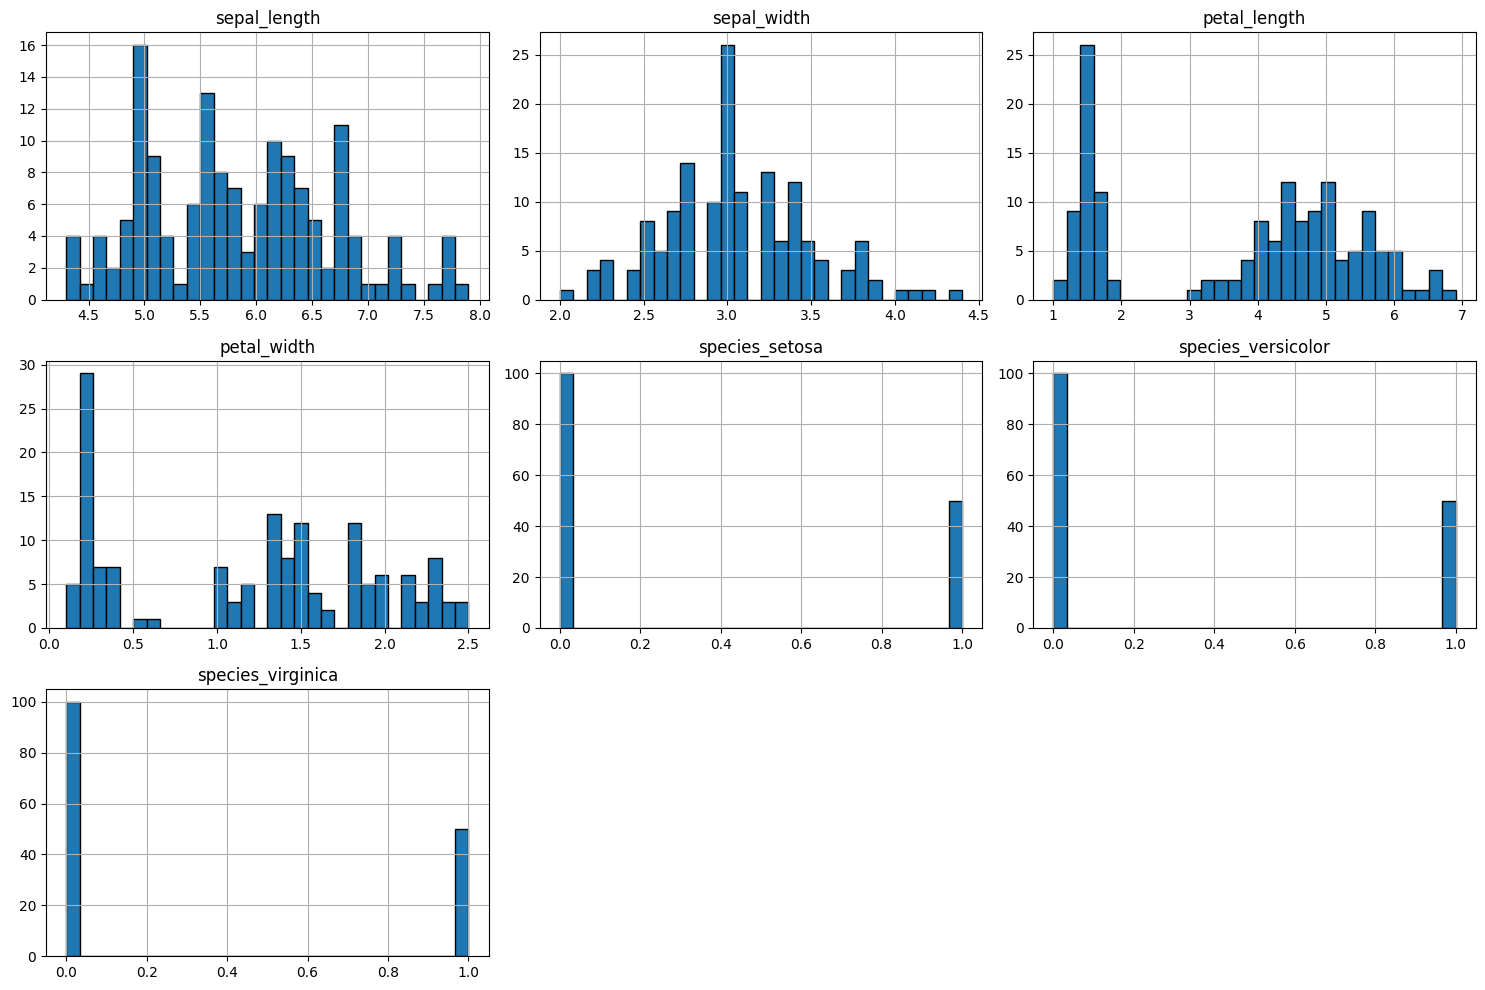

In [20]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()
